In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
# Load the dataset
matches = pd.read_csv("C:\\Users\\Diptyajit Sinha\\.cache\\kagglehub\\datasets\\patrickb1912\\ipl-complete-dataset-20082020\\versions\\3\\matches.csv")  # Ensure matches.csv is in your working dir



In [18]:
# Preview available columns
print("Available Columns:", matches.columns.tolist())



Available Columns: ['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']


In [20]:
# Helper function to safely get a column
def get_col(possible_names):
    for name in possible_names:
        if name in matches.columns:
            return name
    return None

# Columns handling
col_win_by_runs = get_col(["win_by_runs", "by_runs"])
col_win_by_wickets = get_col(["win_by_wickets", "by_wickets"])
col_winner = get_col(["winner", "WinningTeam"])
col_player_of_match = get_col(["player_of_match", "ManOfMatch"])
col_season = get_col(["season", "Season"])
col_date = get_col(["date", "Date"])
col_toss_winner = get_col(["toss_winner"])
col_toss_decision = get_col(["toss_decision"])


### 1. Matches per season

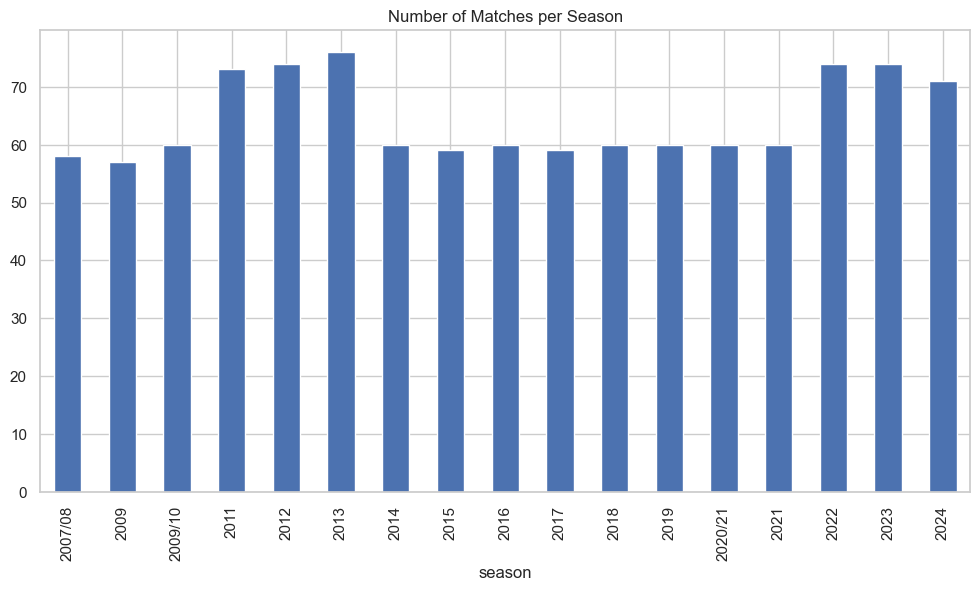

In [21]:
plt.figure(figsize=(12,6))
matches[col_season].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Matches per Season")
plt.show()


### 2. Matches per city

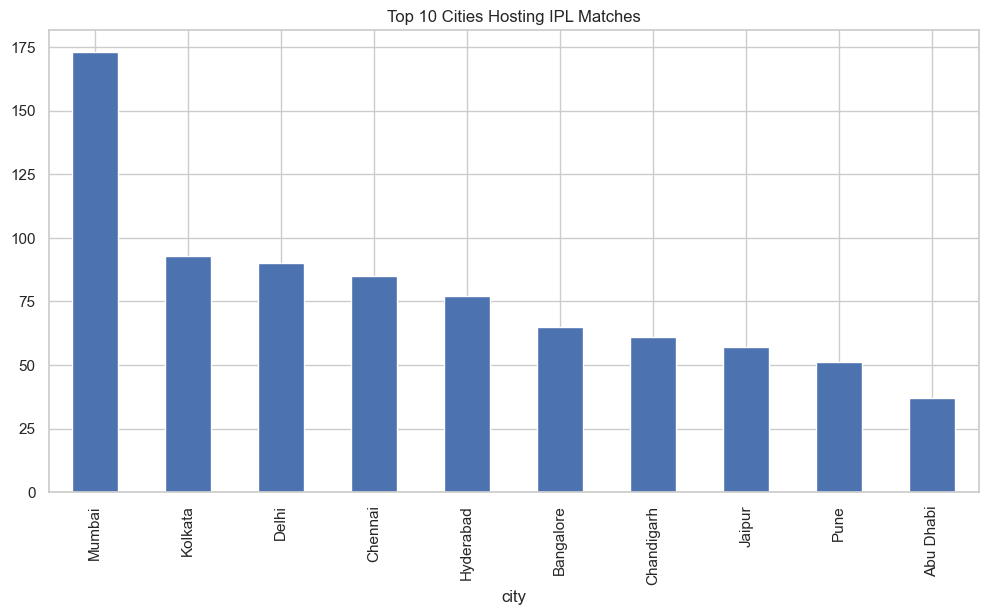

In [22]:
if 'city' in matches.columns:
    plt.figure(figsize=(12,6))
    matches['city'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Cities Hosting IPL Matches")
    plt.show()


### 3. Toss decision counts

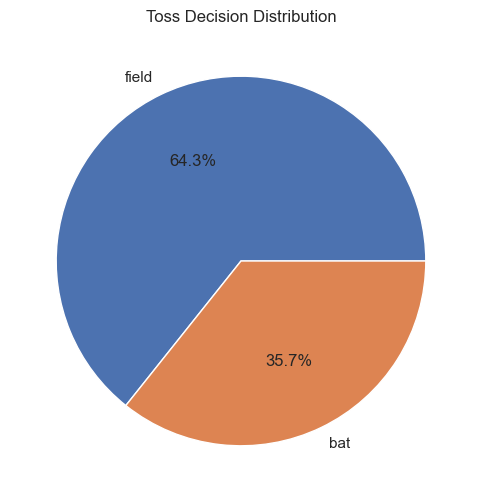

In [23]:
if col_toss_decision:
    plt.figure(figsize=(6,6))
    matches[col_toss_decision].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title("Toss Decision Distribution")
    plt.ylabel("")
    plt.show()

### 4. Toss winners

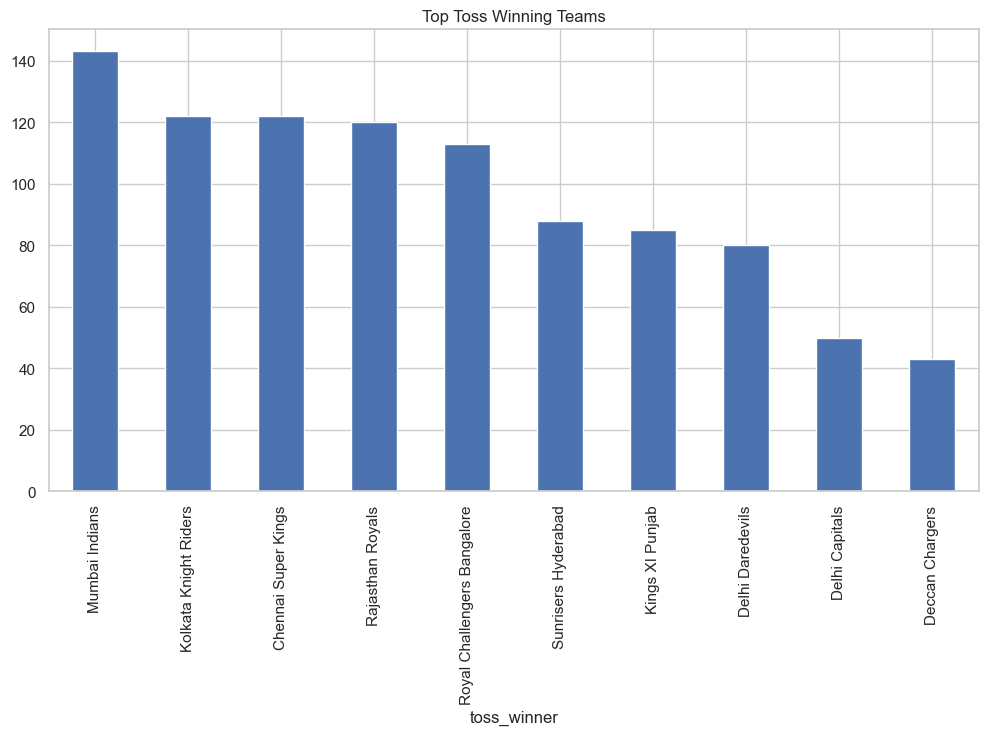

In [25]:
if col_toss_winner:
    plt.figure(figsize=(12,6))
    matches[col_toss_winner].value_counts().head(10).plot(kind='bar')
    plt.title("Top Toss Winning Teams")
    plt.show()

### 5. Match winners

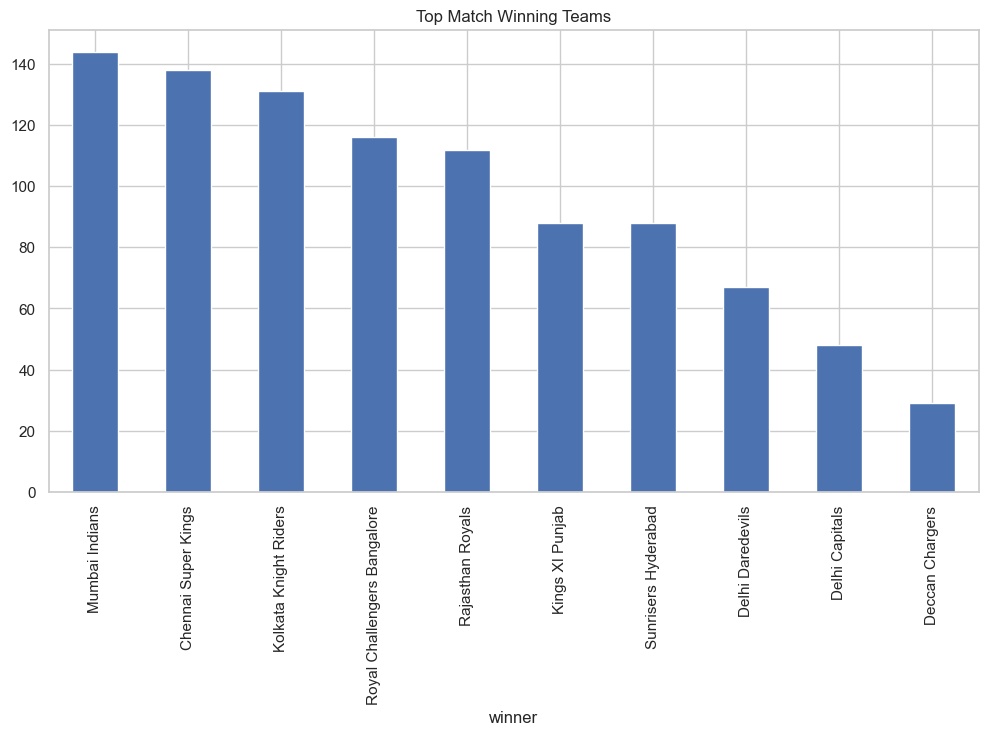

In [26]:
if col_winner:
    plt.figure(figsize=(12,6))
    matches[col_winner].value_counts().head(10).plot(kind='bar')
    plt.title("Top Match Winning Teams")
    plt.show()

### 6. Most Player of the Match awards

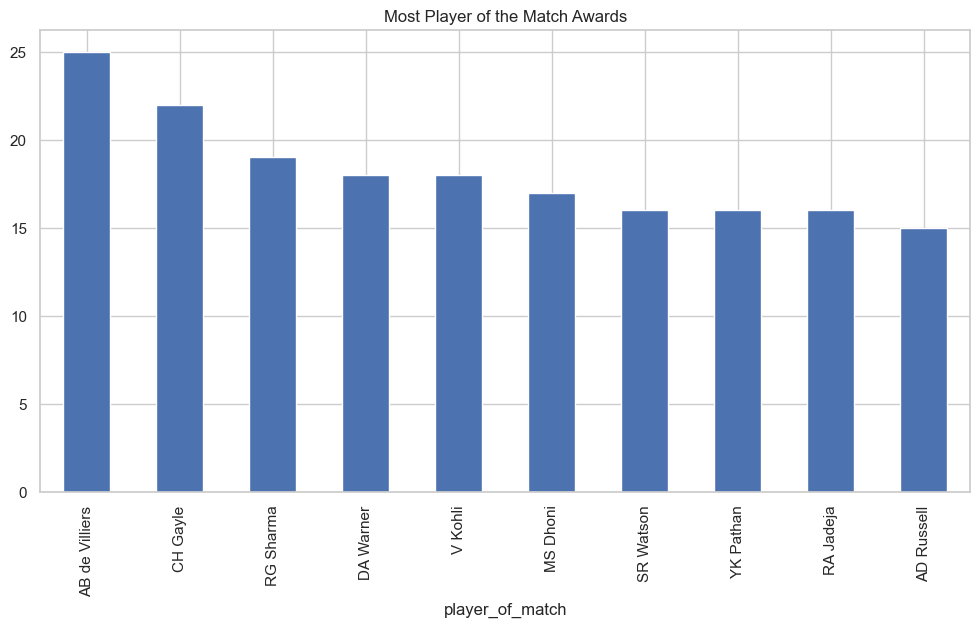

In [27]:
if col_player_of_match:
    plt.figure(figsize=(12,6))
    matches[col_player_of_match].value_counts().head(10).plot(kind='bar')
    plt.title("Most Player of the Match Awards")
    plt.show()

### 7. Finals awards (last match per season)

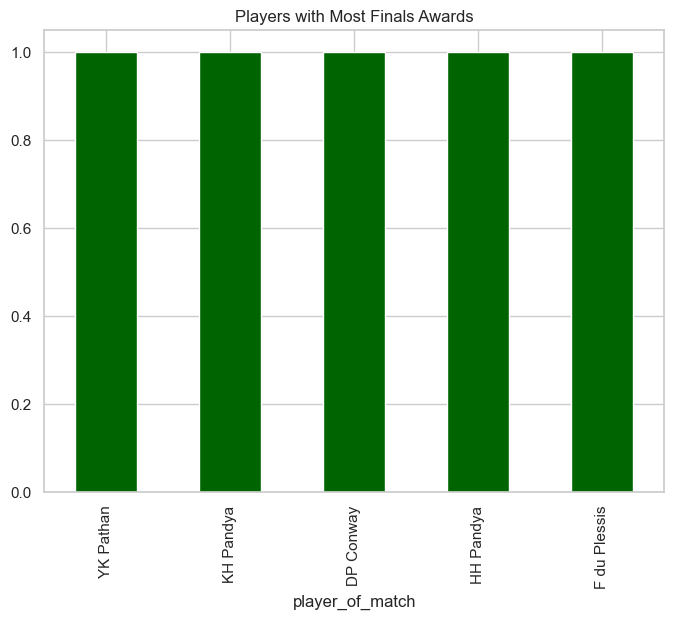

In [29]:
if col_season and col_player_of_match and col_date:
    finals = matches.sort_values(by=[col_season, col_date]).groupby(col_season).tail(1)
    if not finals.empty:
        final_awards = finals[col_player_of_match].value_counts().head(5)
        if not final_awards.empty:
            final_awards.plot(kind='bar', figsize=(8,6), color='darkgreen')
            plt.title("Players with Most Finals Awards")
            plt.show()

### 8. Most Common Venues for IPL Matches

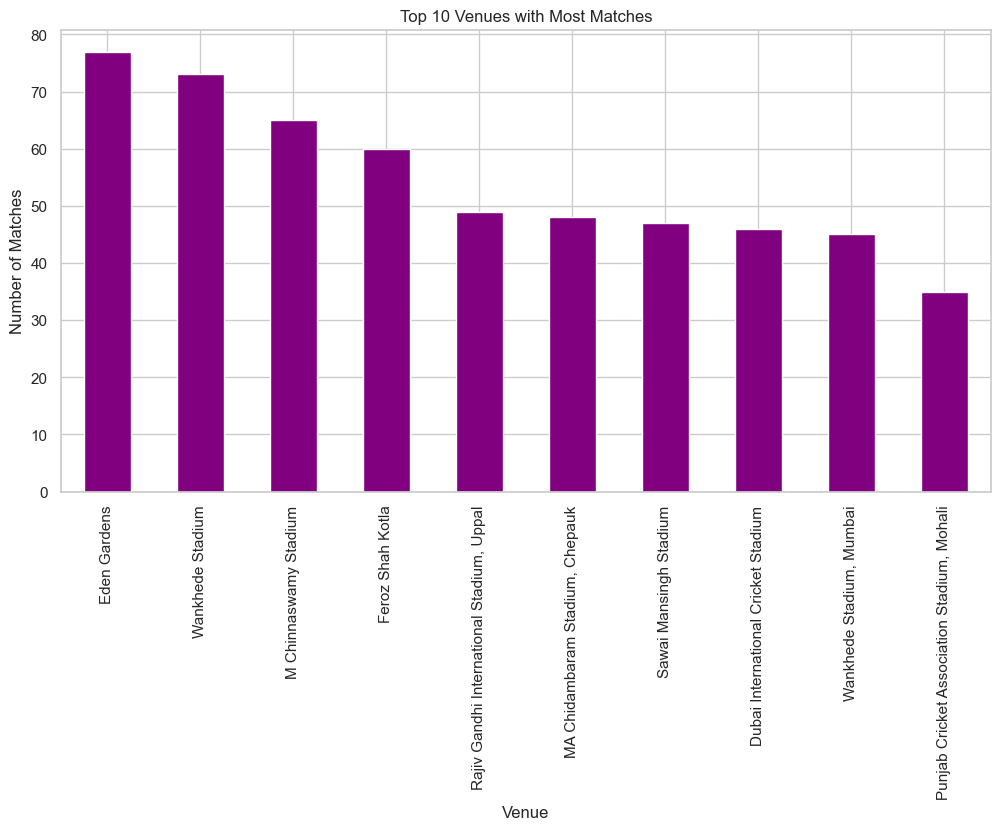

In [35]:
plt.figure(figsize=(12,6))
matches['venue'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Venues with Most Matches")
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.show()


### 📊 9. Which city hosted the most finals?

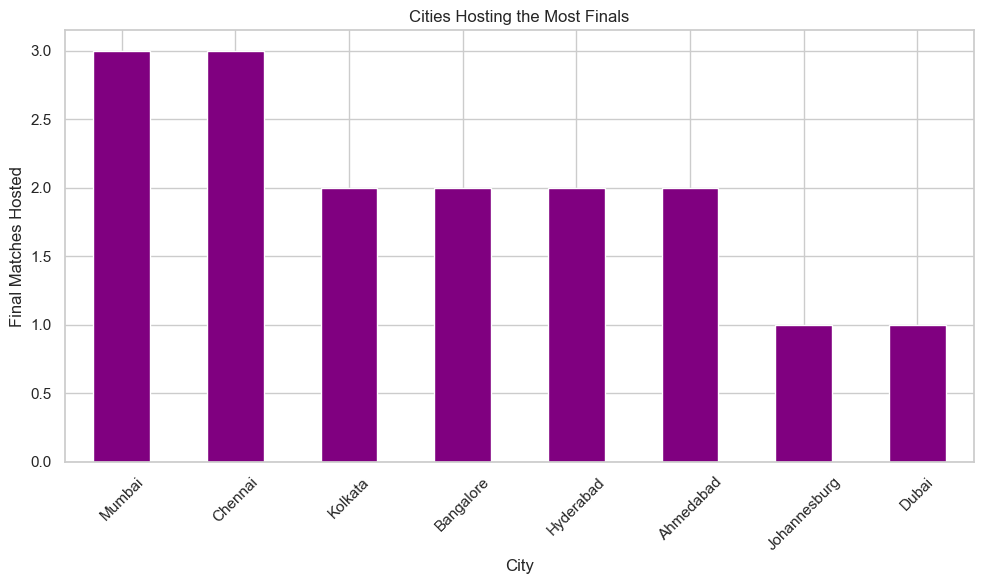

In [66]:
# Cities hosting most finals
if 'match_type' in matches.columns and 'city' in matches.columns:
    finals = matches[matches['match_type'].str.lower() == 'final']
    finals['city'].value_counts().plot(kind='bar', figsize=(10,6), color='purple')
    plt.title("Cities Hosting the Most Finals")
    plt.ylabel("Final Matches Hosted")
    plt.xlabel("City")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 📊 10. Matches Played per Team

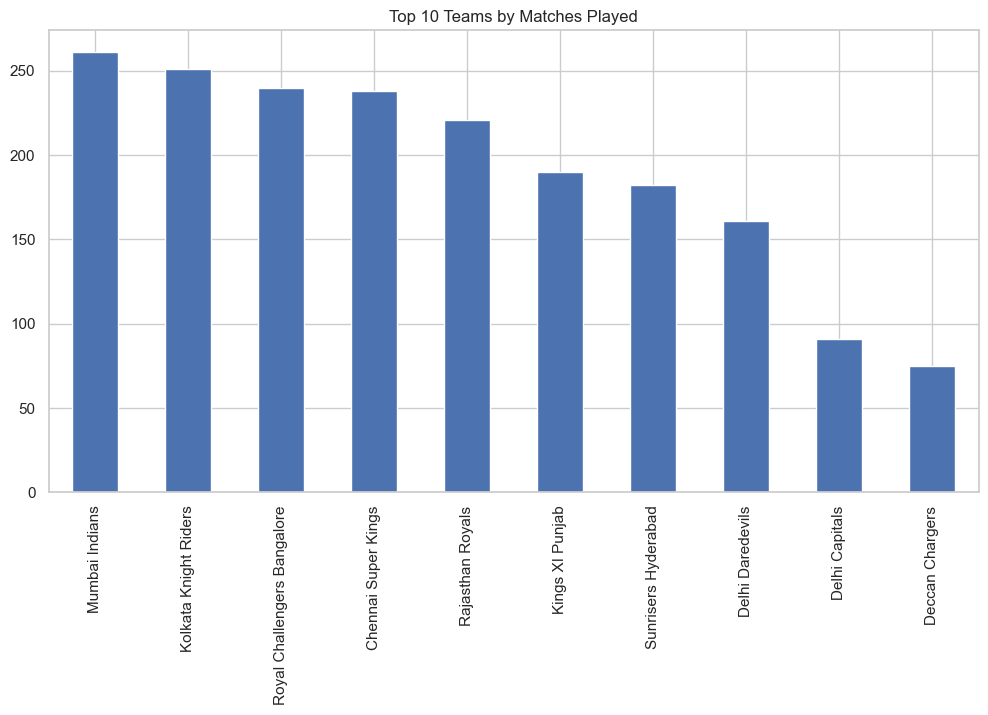

In [37]:
if 'team1' in matches.columns:
    team_matches = pd.concat([matches['team1'], matches['team2']])
    team_matches.value_counts().head(10).plot(kind='bar', figsize=(12,6))
    plt.title("Top 10 Teams by Matches Played")
    plt.show()


### 📊 11. Matches Played per Venue

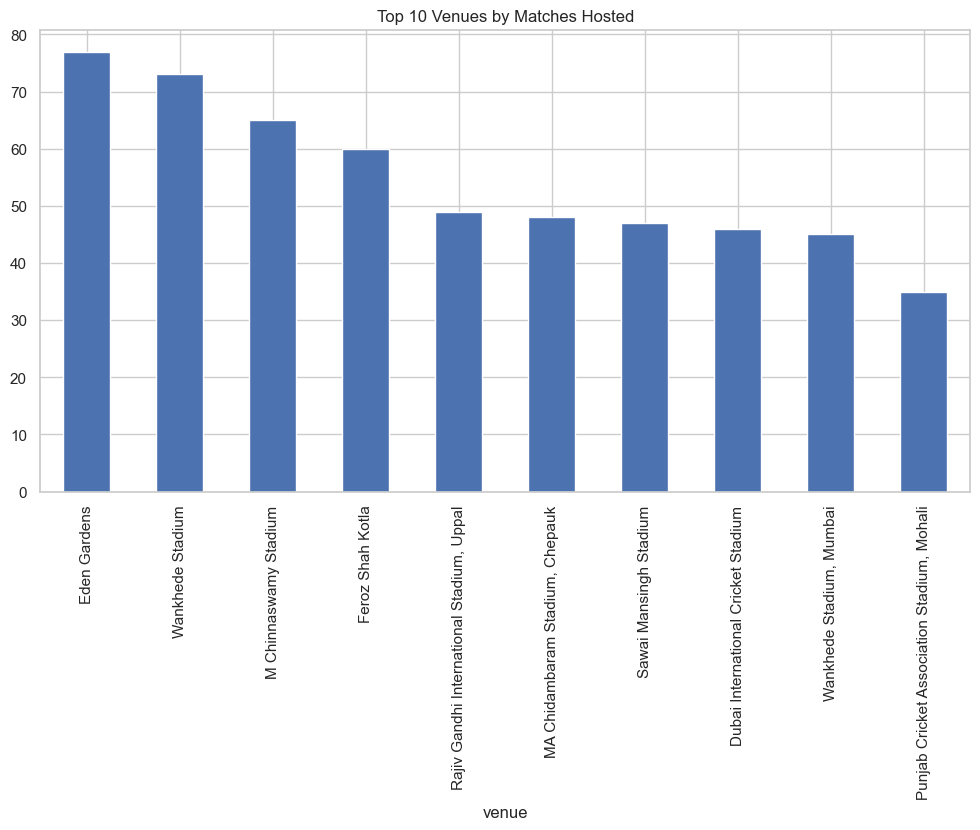

In [38]:
if 'venue' in matches.columns:
    matches['venue'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
    plt.title("Top 10 Venues by Matches Hosted")
    plt.show()


### 📊 12. Season-Wise Winners

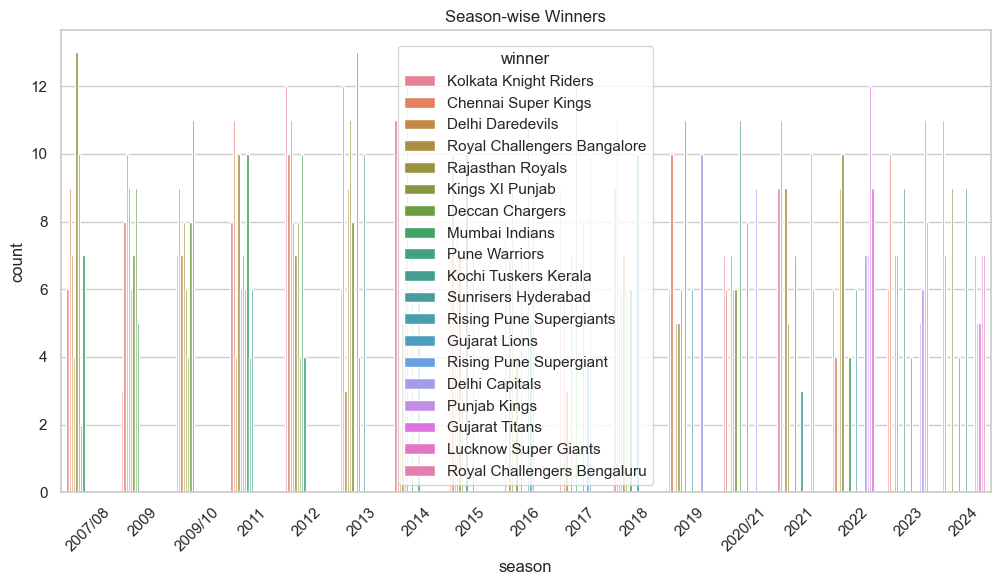

In [39]:
if col_season and col_winner:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col_season, hue=col_winner, data=matches)
    plt.title("Season-wise Winners")
    plt.xticks(rotation=45)
    plt.show()


### 📊 13. Matches Won by Toss Winner

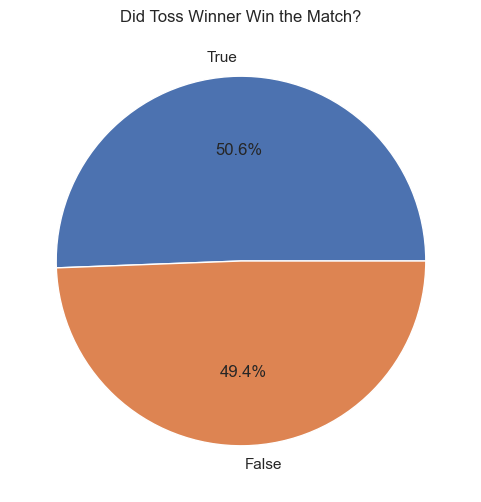

In [40]:
if col_toss_winner and col_winner:
    plt.figure(figsize=(6,6))
    (matches[col_toss_winner] == matches[col_winner]).value_counts().plot(
        kind='pie', autopct='%1.1f%%'
    )
    plt.title("Did Toss Winner Win the Match?")
    plt.ylabel("")
    plt.show()


### 📊 14. Match types distribution (normal, playoff, final, etc.)

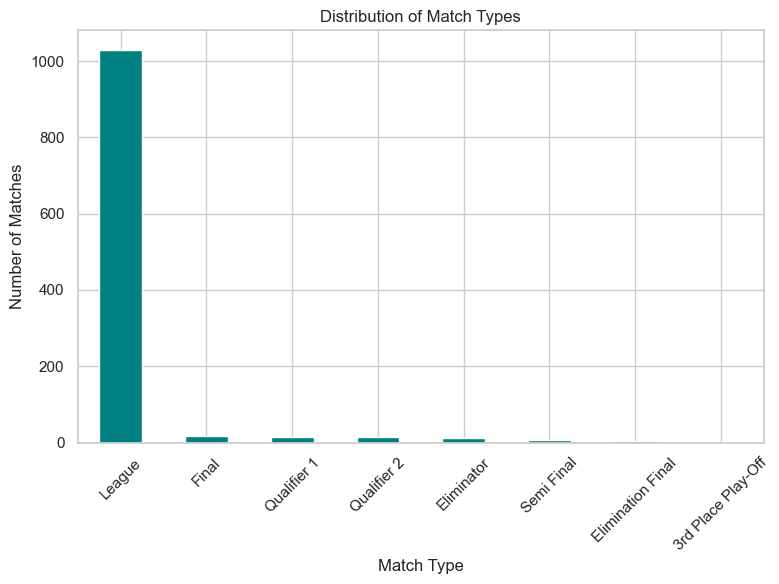

In [65]:
# Match types distribution
import matplotlib.pyplot as plt

if 'match_type' in matches.columns:
    plt.figure(figsize=(8,6))
    matches['match_type'].value_counts().plot(kind='bar', color='teal')
    plt.title("Distribution of Match Types")
    plt.ylabel("Number of Matches")
    plt.xlabel("Match Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 📊 15. Season with Most Matches

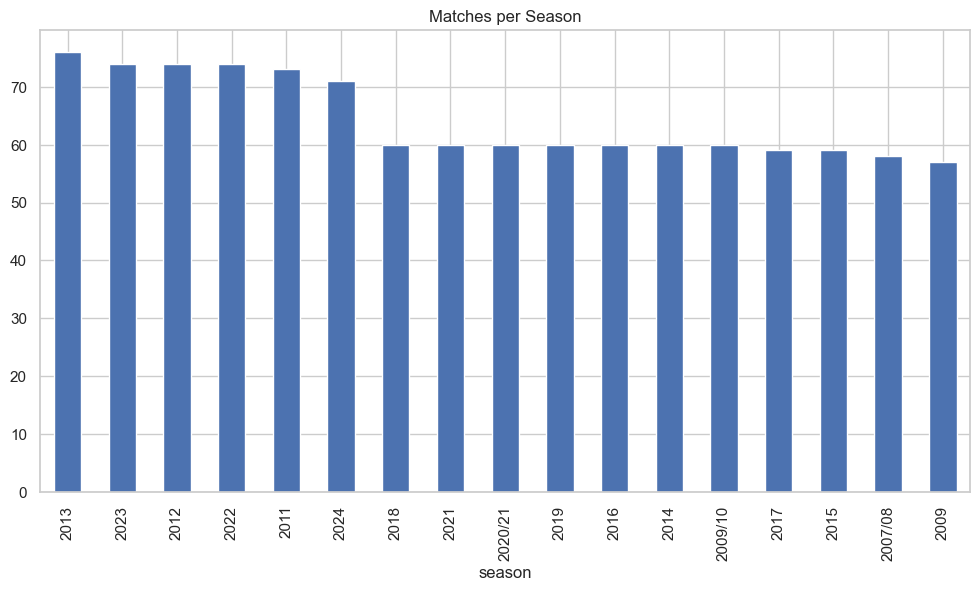

In [42]:
if col_season:
    matches[col_season].value_counts().plot(kind='bar', figsize=(12,6))
    plt.title("Matches per Season")
    plt.show()


#### 📊 16. Matches by weekday — which day of week hosted most matches?

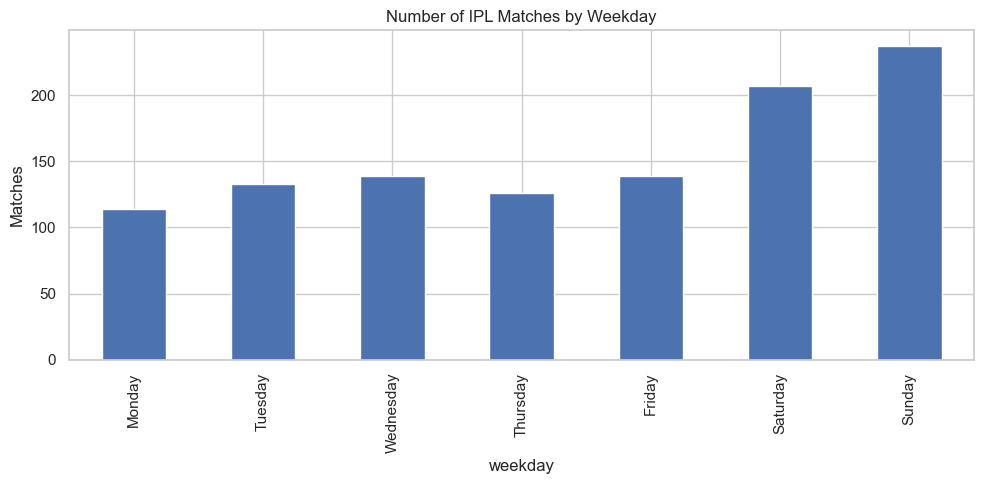

In [64]:
# Matches by weekday
import pandas as pd
import matplotlib.pyplot as plt

if 'matches' not in globals():
    matches = pd.read_csv('matches.csv')

def get_col(df,names):
    for n in names:
        if n in df.columns:
            return n
    return None

col_date = get_col(matches, ['date','Date'])
if not col_date:
    print("Need a 'date' column to compute weekdays.")
else:
    matches[col_date] = pd.to_datetime(matches[col_date], errors='coerce')
    matches['weekday'] = matches[col_date].dt.day_name()
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    counts = matches['weekday'].value_counts().reindex(order).fillna(0)
    plt.figure(figsize=(10,5))
    counts.plot(kind='bar')
    plt.title("Number of IPL Matches by Weekday")
    plt.ylabel("Matches")
    plt.tight_layout()
    plt.show()


### 📊 17. Most Finals Won by a Team

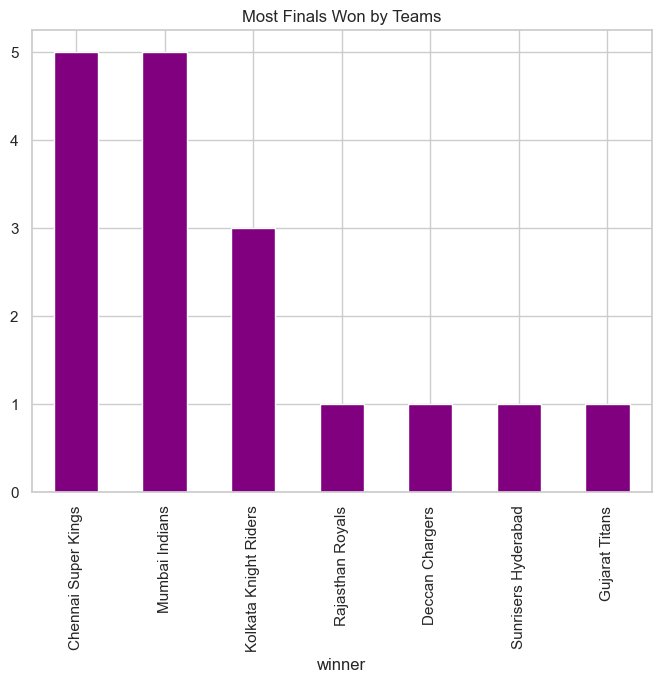

In [44]:
if col_season and col_winner and col_date:
    finals = matches.sort_values(by=[col_season, col_date]).groupby(col_season).tail(1)
    finals[col_winner].value_counts().plot(
        kind='bar', figsize=(8,6), color='purple'
    )
    plt.title("Most Finals Won by Teams")
    plt.show()


### 📊 18. Matches per Umpire

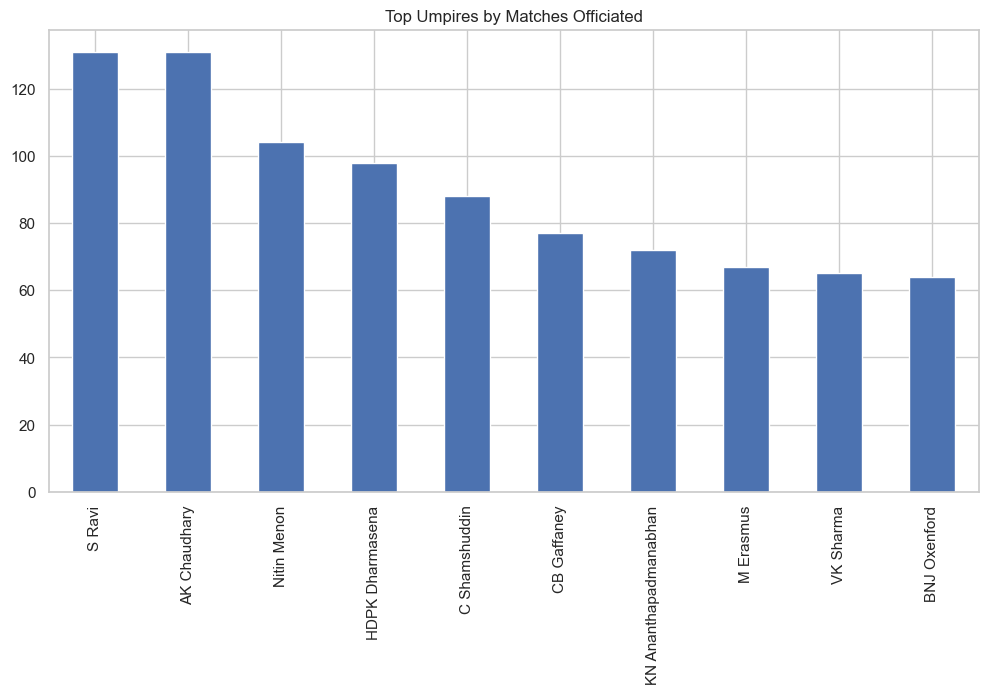

In [45]:
ump_cols = [c for c in matches.columns if 'umpire' in c.lower()]
if ump_cols:
    pd.concat([matches[ump_cols[0]], matches[ump_cols[1]]]).value_counts().head(10).plot(
        kind='bar', figsize=(12,6)
    )
    plt.title("Top Umpires by Matches Officiated")
    plt.show()


### 📊 19. Season-Wise Number of Teams

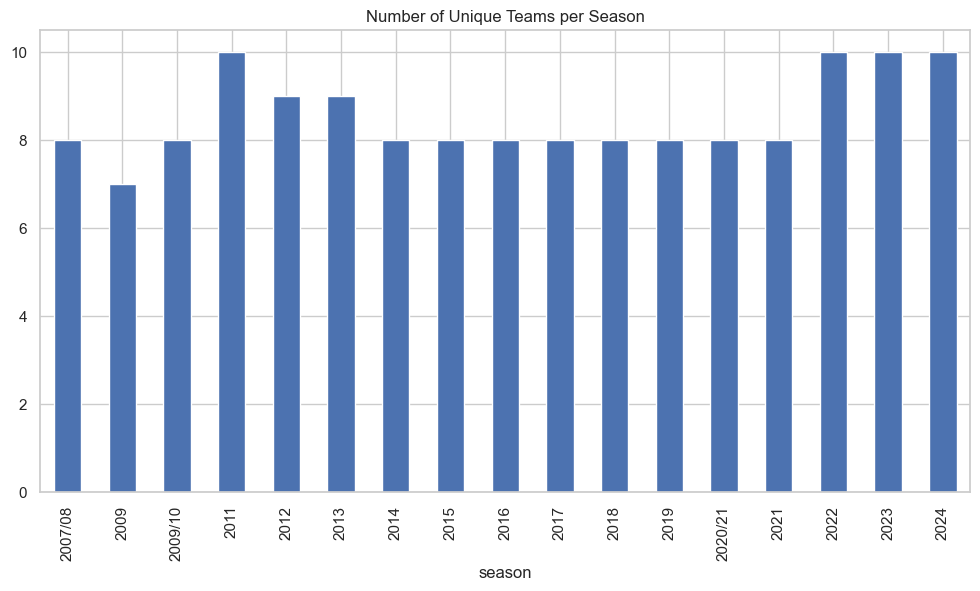

In [46]:
if col_season and 'team1' in matches.columns:
    season_teams = matches.groupby(col_season)['team1'].nunique()
    season_teams.plot(kind='bar', figsize=(12,6))
    plt.title("Number of Unique Teams per Season")
    plt.show()


### 📊 20.Teams that won despite losing the toss (top teams)

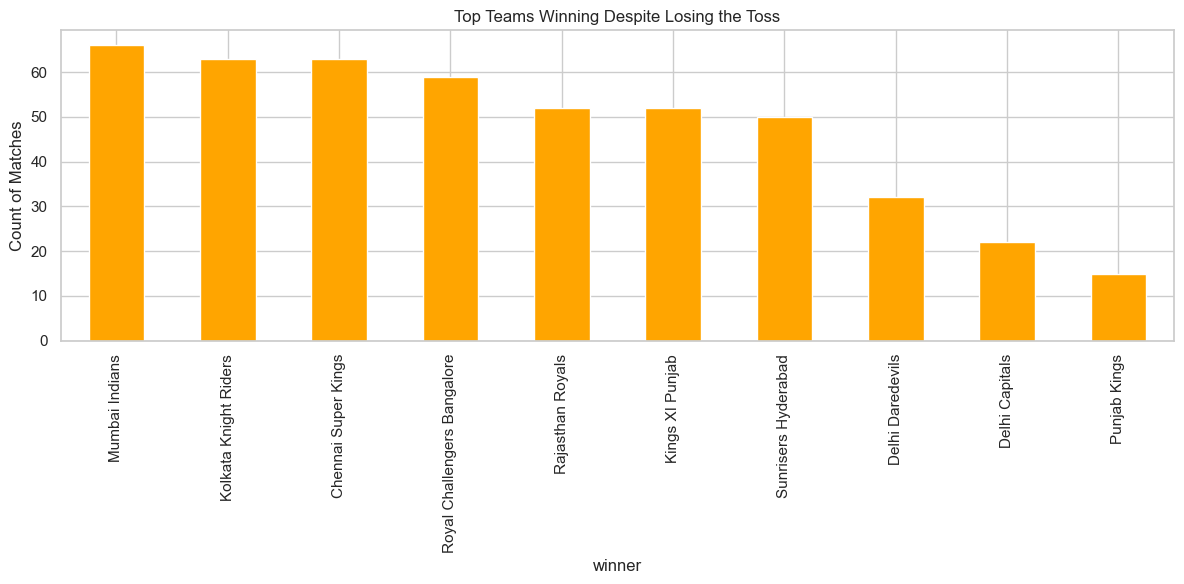

In [63]:
# Teams winning despite losing the toss
import pandas as pd
import matplotlib.pyplot as plt

if 'matches' not in globals():
    matches = pd.read_csv('matches.csv')

def get_col(df,names):
    for n in names:
        if n in df.columns:
            return n
    return None

col_toss_winner = get_col(matches, ['toss_winner'])
col_winner = get_col(matches, ['winner','WinningTeam'])

if not col_toss_winner or not col_winner:
    print("Need 'toss_winner' and 'winner' columns for this analysis.")
else:
    upset = matches[matches[col_toss_winner] != matches[col_winner]]
    s = upset[col_winner].value_counts().head(10)
    plt.figure(figsize=(12,6))
    s.plot(kind='bar', color='orange')
    plt.title("Top Teams Winning Despite Losing the Toss")
    plt.ylabel("Count of Matches")
    plt.tight_layout()
    plt.show()


### 📊 21. Toss decision trend by season (stacked proportions: bat vs field)

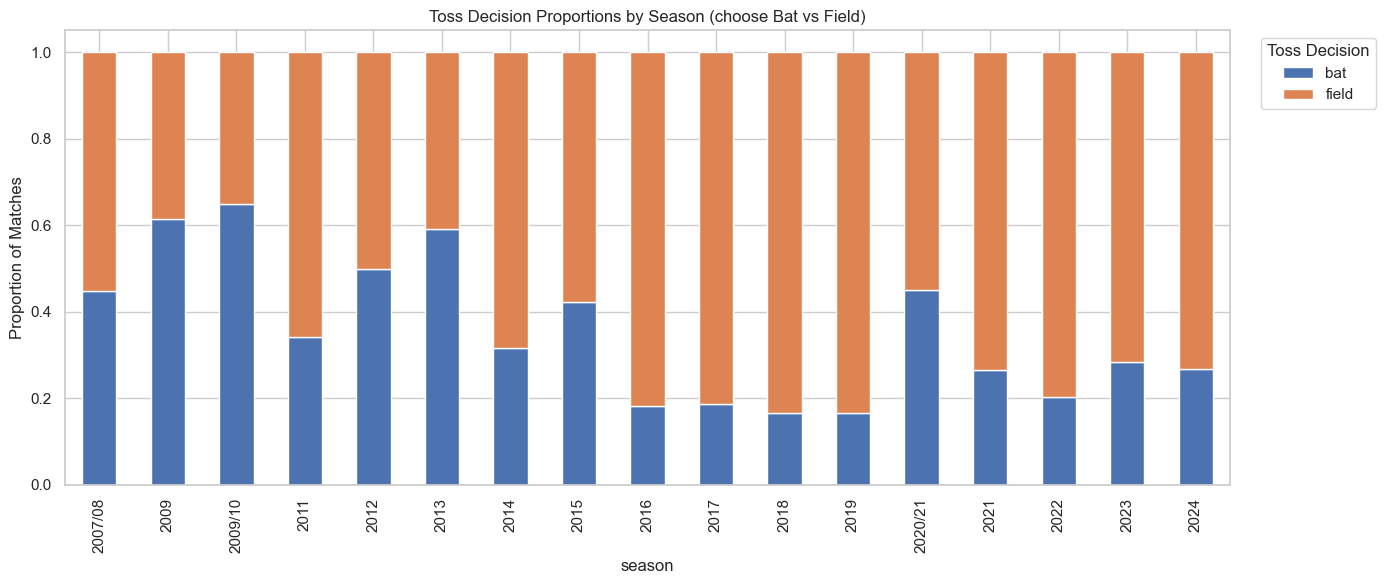

In [62]:
# Toss decision trend by season (stacked proportions)
import pandas as pd
import matplotlib.pyplot as plt

if 'matches' not in globals():
    matches = pd.read_csv('matches.csv')

def get_col(df,names):
    for n in names:
        if n in df.columns:
            return n
    return None

col_season = get_col(matches, ['season','Season'])
col_toss_decision = get_col(matches, ['toss_decision'])

if not col_season or not col_toss_decision:
    print("Need 'season' and 'toss_decision' columns for this analysis.")
else:
    key = 'id' if 'id' in matches.columns else col_season
    pivot = matches.pivot_table(index=col_season, columns=col_toss_decision, values=key, aggfunc='count', fill_value=0)
    pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)  # proportions
    pivot_norm.plot(kind='bar', stacked=True, figsize=(14,6))
    plt.title("Toss Decision Proportions by Season (choose Bat vs Field)")
    plt.ylabel("Proportion of Matches")
    plt.legend(title='Toss Decision', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout()
    plt.show()


### 📊 22. Matches Ending in Ties

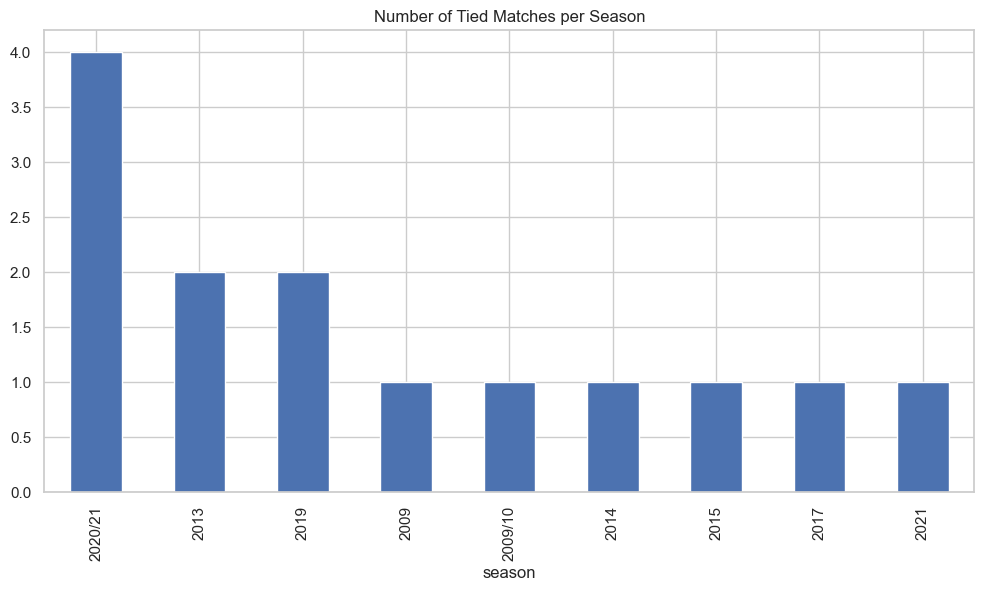

In [49]:
if 'result' in matches.columns:
    matches[matches['result'].str.contains('tie', case=False, na=False)][col_season].value_counts().plot(
        kind='bar', figsize=(12,6)
    )
    plt.title("Number of Tied Matches per Season")
    plt.show()


### 📊 23. Most Matches Won in a Single Season by a Team

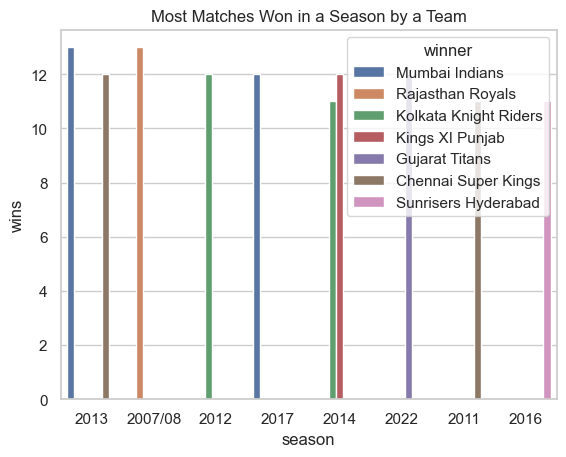

In [50]:
if col_season and col_winner:
    season_wins = matches.groupby([col_season, col_winner]).size().reset_index(name='wins')
    top_wins = season_wins.sort_values('wins', ascending=False).head(10)
    sns.barplot(x=col_season, y='wins', hue=col_winner, data=top_wins)
    plt.title("Most Matches Won in a Season by a Team")
    plt.show()


### 📊 24. Season with Highest Number of Different Venues

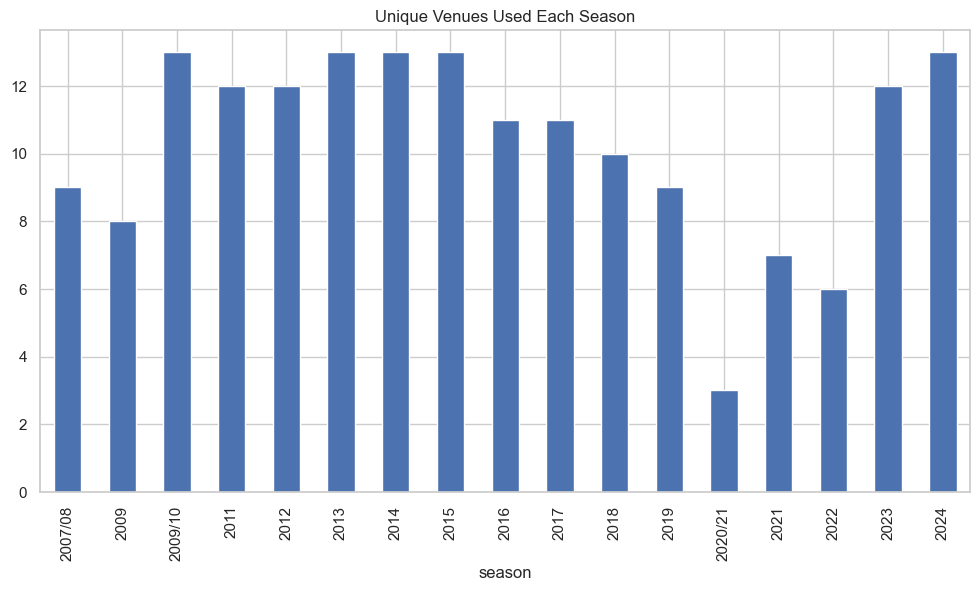

In [52]:
if col_season and 'venue' in matches.columns:
    matches.groupby(col_season)['venue'].nunique().plot(
        kind='bar', figsize=(12,6)
    )
    plt.title("Unique Venues Used Each Season")
    plt.show()


### 📊 25. Venue dominance — which team has the most wins at each venue (top 10 venues)

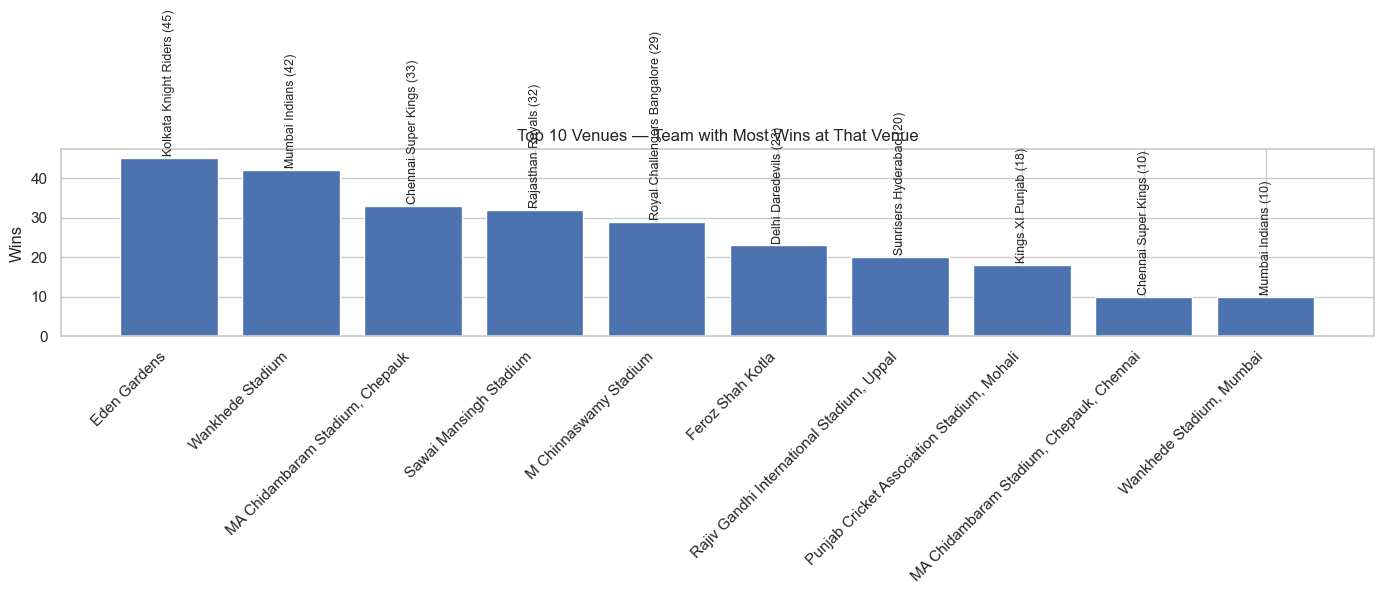

In [61]:
# Venue dominance: team with most wins at each venue (top 10 venues by that count)
import pandas as pd
import matplotlib.pyplot as plt

if 'matches' not in globals():
    matches = pd.read_csv('matches.csv')

def get_col(df,names):
    for n in names:
        if n in df.columns:
            return n
    return None

col_winner = get_col(matches, ['winner','WinningTeam'])

if 'venue' not in matches.columns or not col_winner:
    print("Need 'venue' and 'winner' columns for this analysis.")
else:
    vw = (matches.dropna(subset=['venue', col_winner])
              .groupby(['venue', col_winner])
              .size()
              .reset_index(name='wins'))
    # index of max wins per venue
    idx = vw.groupby('venue')['wins'].idxmax()
    top = vw.loc[idx].sort_values('wins', ascending=False).head(10).reset_index(drop=True)

    plt.figure(figsize=(14,6))
    bars = plt.bar(range(len(top)), top['wins'])
    plt.xticks(range(len(top)), top['venue'], rotation=45, ha='right')
    for i, row in top.iterrows():
        plt.text(i, row['wins'] + 0.5, f"{row[col_winner]} ({int(row['wins'])})", ha='center', va='bottom', fontsize=9, rotation=90)
    plt.title("Top 10 Venues — Team with Most Wins at That Venue")
    plt.ylabel("Wins")
    plt.tight_layout()
    plt.show()


### 📊 26. Player of Match by Season

In [54]:
if col_season and col_player_of_match:
    top_pom = matches.groupby(col_season)[col_player_of_match].agg(lambda x: x.value_counts().index[0])
    print("Top Player of the Match per Season:\n", top_pom)


Top Player of the Match per Season:
 season
2007/08           SE Marsh
2009             YK Pathan
2009/10       SR Tendulkar
2011              CH Gayle
2012              CH Gayle
2013            MEK Hussey
2014            GJ Maxwell
2015             DA Warner
2016               V Kohli
2017       NM Coulter-Nile
2018           Rashid Khan
2019            AD Russell
2020/21         RD Gaikwad
2021            RD Gaikwad
2022         Kuldeep Yadav
2023          Shubman Gill
2024               TM Head
Name: player_of_match, dtype: object


### 📊 27. Team with Most Toss + Match Wins

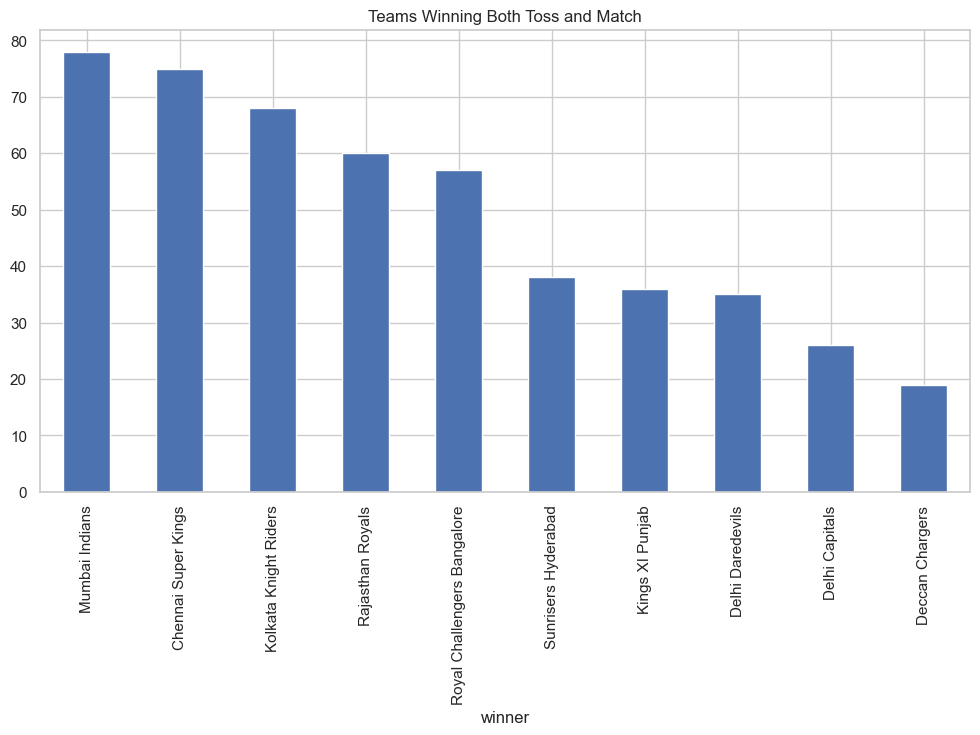

In [55]:
if col_toss_winner and col_winner:
    both = matches[matches[col_toss_winner] == matches[col_winner]][col_winner].value_counts()
    both.head(10).plot(kind='bar', figsize=(12,6))
    plt.title("Teams Winning Both Toss and Match")
    plt.show()


### 📊 28. Top head-to-head rivalries (most played pairs) — wins for each side

<Figure size 1400x600 with 0 Axes>

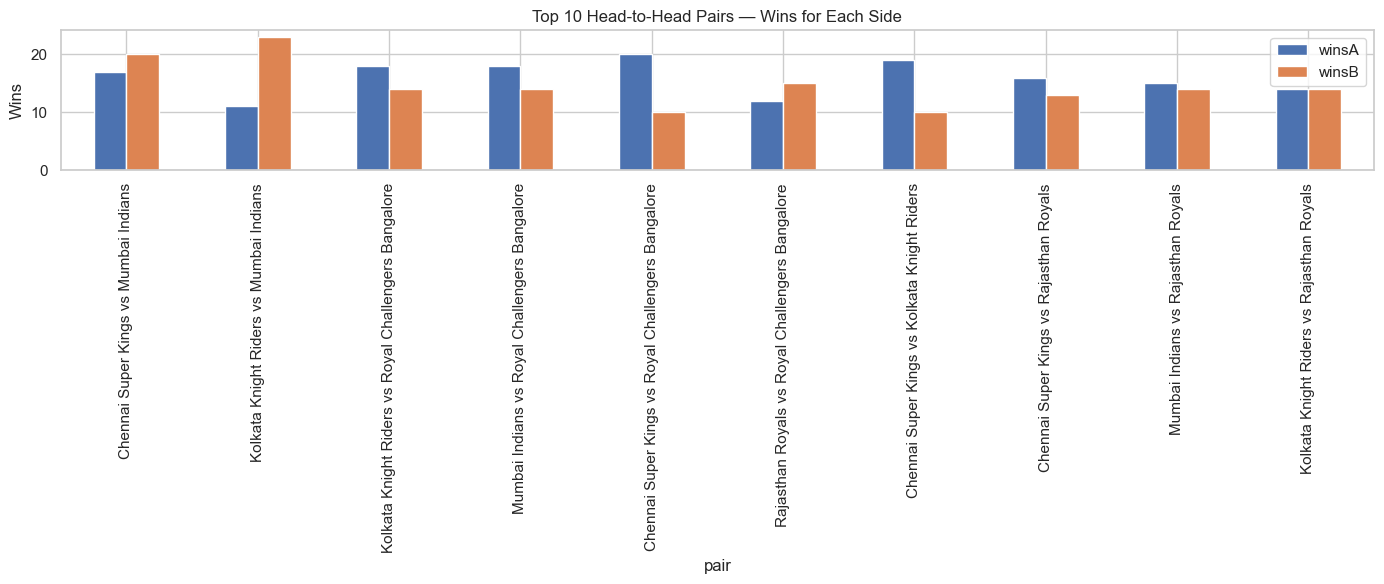

In [60]:
# Head-to-head rivalries: top 10 most-played pairs and wins for each side
import pandas as pd
import matplotlib.pyplot as plt

if 'matches' not in globals():
    matches = pd.read_csv('matches.csv')

def get_col(df,names):
    for n in names:
        if n in df.columns:
            return n
    return None

col_winner = get_col(matches, ['winner','WinningTeam'])

if not {'team1','team2'}.issubset(matches.columns):
    print("Need 'team1' and 'team2' columns for head-to-head analysis.")
elif not col_winner:
    print("Need 'winner' column to compute head-to-head wins.")
else:
    pairs = {}
    for _,r in matches.iterrows():
        t1 = r['team1']; t2 = r['team2']
        key = tuple(sorted([t1,t2]))
        if key not in pairs:
            pairs[key] = {'matches':0, 'wins':{key[0]:0, key[1]:0}}
        pairs[key]['matches'] += 1
        w = r[col_winner]
        if pd.notna(w) and w in pairs[key]['wins']:
            pairs[key]['wins'][w] += 1

    # top 10 by matches
    top_pairs = sorted(pairs.items(), key=lambda x: x[1]['matches'], reverse=True)[:10]
    rows = []
    for (a,b),info in top_pairs:
        rows.append({
            'pair': f"{a} vs {b}",
            'teamA': a, 'teamB': b,
            'matches': info['matches'],
            'winsA': info['wins'][a],
            'winsB': info['wins'][b]
        })
    df = pd.DataFrame(rows).set_index('pair')

    plt.figure(figsize=(14,6))
    df[['winsA','winsB']].plot(kind='bar', stacked=False, figsize=(14,6))
    plt.title("Top 10 Head-to-Head Pairs — Wins for Each Side")
    plt.ylabel("Wins")
    plt.tight_layout()
    plt.show()


### 📊 29. Longest winning streak by team (consecutive wins in the matches they played)

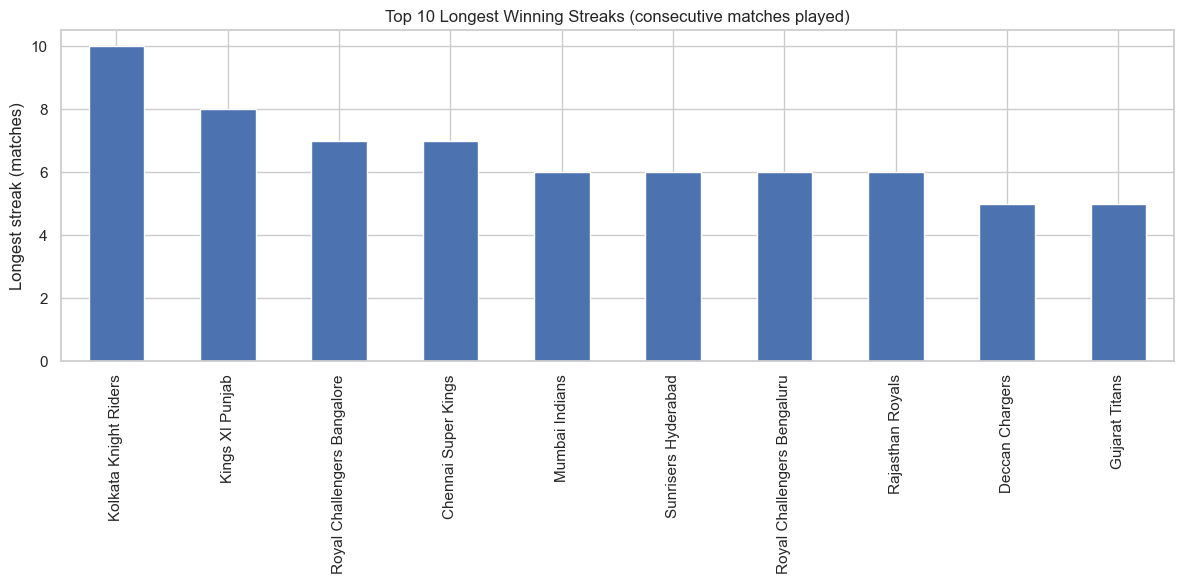

In [59]:
# Longest winning streak by team (consecutive wins in matches they played)
import pandas as pd
import matplotlib.pyplot as plt

# ensure matches DataFrame exists (if not, load it)
if 'matches' not in globals():
    matches = pd.read_csv('matches.csv')

def get_col(df,names):
    for n in names:
        if n in df.columns:
            return n
    return None

col_winner = get_col(matches, ['winner','WinningTeam'])
col_date = get_col(matches, ['date','Date'])

if not col_winner or not col_date:
    print("Need 'winner' and 'date' columns for this analysis.")
else:
    matches[col_date] = pd.to_datetime(matches[col_date], errors='coerce')
    # all teams
    teams = pd.unique(matches[['team1','team2']].values.ravel())
    streaks = {}
    for team in teams:
        tm = matches[(matches['team1']==team)|(matches['team2']==team)].sort_values(col_date)
        current = 0
        best = 0
        for _, r in tm.iterrows():
            if pd.isna(r[col_winner]): 
                continue
            if r[col_winner] == team:
                current += 1
                if current > best:
                    best = current
            else:
                current = 0
        streaks[team] = best

    s = pd.Series(streaks).sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    s.plot(kind='bar')
    plt.title("Top 10 Longest Winning Streaks (consecutive matches played)")
    plt.ylabel("Longest streak (matches)")
    plt.tight_layout()
    plt.show()


### 📊 30. Season-Wise Top Winner

In [58]:
if col_season and col_winner:
    top_winner = matches.groupby(col_season)[col_winner].agg(lambda x: x.value_counts().index[0])
    print("Top Winner of Each Season:\n", top_winner)


Top Winner of Each Season:
 season
2007/08         Rajasthan Royals
2009            Delhi Daredevils
2009/10           Mumbai Indians
2011         Chennai Super Kings
2012       Kolkata Knight Riders
2013              Mumbai Indians
2014             Kings XI Punjab
2015         Chennai Super Kings
2016         Sunrisers Hyderabad
2017              Mumbai Indians
2018         Chennai Super Kings
2019              Mumbai Indians
2020/21           Mumbai Indians
2021         Chennai Super Kings
2022              Gujarat Titans
2023              Gujarat Titans
2024       Kolkata Knight Riders
Name: winner, dtype: object
